In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from scipy import stats
import plotly.express as px
from statistics import mean

In [2]:
f = '/Users/shenchingfeng/Documents/1112/機器學習/Homework 2/all.csv'

df = pd.read_csv(f)
df.drop(['Unnamed: 0'], axis = 1, inplace = True) ## Red wine == 1 ; White wine == 0
df

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4              0.70         0.00             1.9      0.076   
1               7.8              0.88         0.00             2.6      0.098   
2               7.8              0.76         0.04             2.3      0.092   
3              11.2              0.28         0.56             1.9      0.075   
4               7.4              0.70         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
6492            6.2              0.21         0.29             1.6      0.039   
6493            6.6              0.32         0.36             8.0      0.047   
6494            6.5              0.24         0.19             1.2      0.041   
6495            5.5              0.29         0.30             1.1      0.022   
6496            6.0              0.21         0.38             0.8      0.020   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
6492                 24.0                  92.0  0.99114  3.27       0.50   
6493                 57.0                 168.0  0.99490  3.15       0.46   
6494                 30.0                 111.0  0.99254  2.99       0.46   
6495                 20.0                 110.0  0.98869  3.34       0.38   
6496                 22.0                  98.0  0.98941  3.26       0.32   

      alcohol  quality  wine  
0         9.4        5     1  
1         9.8        5     1  
2         9.8        5     1  
3         9.8        6     1  
4         9.4        5     1  
...       ...      ...   ...  
6492     11.2        6     0  
6493      9.6        5     0  
6494      9.4        6     0  
6495     12.8        7     0  
6496     11.8        6     0  

[6497 rows x 13 columns]

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  wine                  6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 660.0 KB


In [4]:
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
wine                    0
dtype: int64

In [5]:
df.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    6497.000000       6497.000000  6497.000000     6497.000000   
mean        7.215307          0.339666     0.318633        5.443235   
std         1.296434          0.164636     0.145318        4.757804   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.400000          0.230000     0.250000        1.800000   
50%         7.000000          0.290000     0.310000        3.000000   
75%         7.700000          0.400000     0.390000        8.100000   
max        15.900000          1.580000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  6497.000000          6497.000000           6497.000000  6497.000000   
mean      0.056034            30.525319            115.744574     0.994697   
std       0.035034            17.749400             56.521855     0.002999   
min       0.009000             1.000000              6.000000     0.987110   
25%       0.038000            17.000000             77.000000     0.992340   
50%       0.047000            29.000000            118.000000     0.994890   
75%       0.065000            41.000000            156.000000     0.996990   
max       0.611000           289.000000            440.000000     1.038980   

                pH    sulphates      alcohol      quality         wine  
count  6497.000000  6497.000000  6497.000000  6497.000000  6497.000000  
mean      3.218501     0.531268    10.491801     5.818378     0.246114  
std       0.160787     0.148806     1.192712     0.873255     0.430779  
min       2.720000     0.220000     8.000000     3.000000     0.000000  
25%       3.110000     0.430000     9.500000     5.000000     0.000000  
50%       3.210000     0.510000    10.300000     6.000000     0.000000  
75%       3.320000     0.600000    11.300000     6.000000     0.000000  
max       4.010000     2.000000    14.900000     9.000000     1.000000

# Detect the Multicollinearity

## Correlation Coefficient

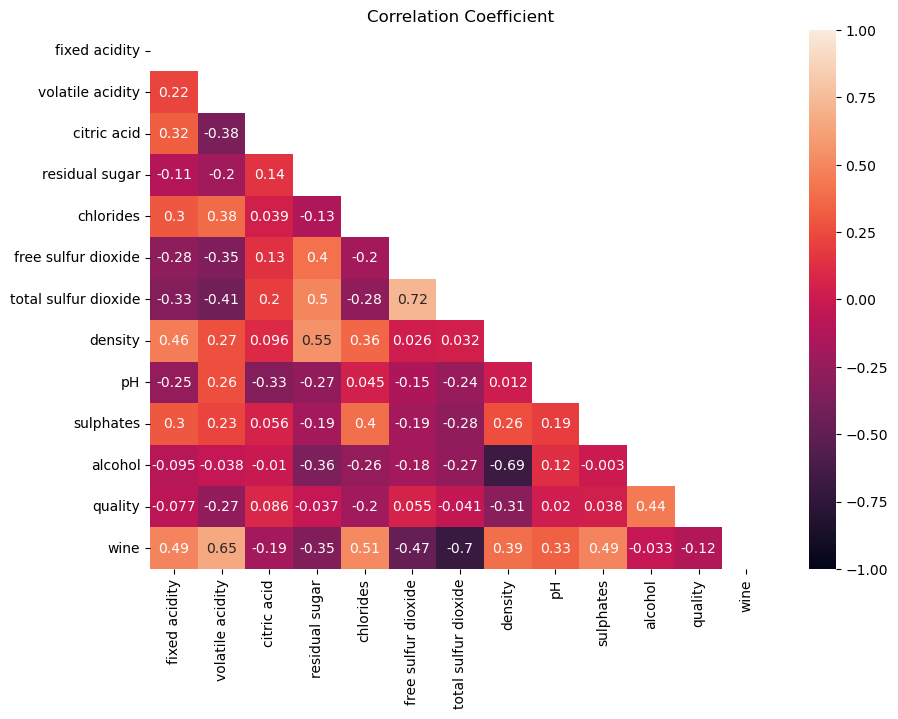

In [8]:
plt.figure(
    figsize = (10,7)
)

mask = np.triu(
    np.ones_like(
        df.corr(), dtype = bool
    )
)

sns.heatmap(
    df.corr(), 
    annot=True, 
    mask = mask, 
    vmin = -1, vmax = 1
)

plt.title('Correlation Coefficient')
plt.show()

## Variance Inflation Factor

#### "density" VIF is too high

In [10]:
def compute_vif(considered_features):
    
    X = df[considered_features]
    X['intercept'] = 1
    
    vif = pd.DataFrame()
    vif[ 'Variable' ] = X.columns
    vif[ 'VIF' ] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif = vif[vif['Variable'] != 'intercept']
    return vif

considered_features = df.drop(['wine'], axis = 1).columns

compute_vif(considered_features).sort_values('VIF', ascending = False)

Variable        VIF
7                density  15.964831
3         residual sugar   7.308546
10               alcohol   4.970044
0          fixed acidity   4.911189
6   total sulfur dioxide   2.974040
8                     pH   2.545764
5    free sulfur dioxide   2.156281
1       volatile acidity   2.037955
4              chlorides   1.632490
2            citric acid   1.608690
9              sulphates   1.565737
11               quality   1.412703

#### VIF after remove "density"

In [11]:
considered_features = df.drop(['wine', 'density'], axis = 1).columns
compute_vif(considered_features).sort_values('VIF', ascending = False)

/var/folders/56/1hl93h654354jd5vh2zjmd640000gn/T/ipykernel_3267/3305793119.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['intercept'] = 1


Variable       VIF
6   total sulfur dioxide  2.873884
5    free sulfur dioxide  2.156276
1       volatile acidity  1.809241
0          fixed acidity  1.783922
9                alcohol  1.697222
2            citric acid  1.608526
4              chlorides  1.565547
3         residual sugar  1.532924
7                     pH  1.416984
10               quality  1.408249
8              sulphates  1.365039

# Data Distribution
## Measures of Skewness and Kurtosis

In [12]:
select_col = df.drop(['wine', 'density'], axis = 1)

for i in select_col:
    print(f"{i} Skewness:", round(df[i].skew(), 2))
    print(f"{i} Kurtosis:", round(df[i].kurt(), 2))
    print("=======================")

fixed acidity Skewness: 1.72
fixed acidity Kurtosis: 5.06
volatile acidity Skewness: 1.5
volatile acidity Kurtosis: 2.83
citric acid Skewness: 0.47
citric acid Kurtosis: 2.4
residual sugar Skewness: 1.44
residual sugar Kurtosis: 4.36
chlorides Skewness: 5.4
chlorides Kurtosis: 50.9
free sulfur dioxide Skewness: 1.22
free sulfur dioxide Kurtosis: 7.91
total sulfur dioxide Skewness: -0.0
total sulfur dioxide Kurtosis: -0.37
pH Skewness: 0.39
pH Kurtosis: 0.37
sulphates Skewness: 1.8
sulphates Kurtosis: 8.65
alcohol Skewness: 0.57
alcohol Kurtosis: -0.53
quality Skewness: 0.19
quality Kurtosis: 0.23


## Log Transform

In [13]:
for i in select_col:
    print(f"{i} Skewness:", round(np.log1p(df[i]).skew(), 2))
    print(f"{i} Kurtosis:", round(np.log1p(df[i]).kurt(), 2))
    print("=======================")

fixed acidity Skewness: 0.98
fixed acidity Kurtosis: 2.1
volatile acidity Skewness: 1.13
volatile acidity Kurtosis: 1.19
citric acid Skewness: -0.09
citric acid Kurtosis: 1.08
residual sugar Skewness: 0.41
residual sugar Kurtosis: -1.16
chlorides Skewness: 4.48
chlorides Kurtosis: 35.6
free sulfur dioxide Skewness: -0.72
free sulfur dioxide Kurtosis: 0.12
total sulfur dioxide Skewness: -1.35
total sulfur dioxide Kurtosis: 1.27
pH Skewness: 0.26
pH Kurtosis: 0.2
sulphates Skewness: 1.1
sulphates Kurtosis: 3.19
alcohol Skewness: 0.4
alcohol Kurtosis: -0.76
quality Skewness: -0.28
quality Kurtosis: 0.71


## Yeo-Johnson Transform

In [15]:
for i in select_col:
    transformed_data, lambda_value = stats.yeojohnson(df[i])

    print(f"{i} Skewness:", round(stats.skew(transformed_data), 2))
    print(f"{i} Kurtosis:", round(stats.kurtosis(transformed_data), 2))
    print("=======================")

fixed acidity Skewness: -0.06
fixed acidity Kurtosis: 1.08
volatile acidity Skewness: 0.11
volatile acidity Kurtosis: -0.57
citric acid Skewness: 0.01
citric acid Kurtosis: 1.19
residual sugar Skewness: 0.14
residual sugar Kurtosis: -1.35
chlorides Skewness: 0.19
chlorides Kurtosis: -0.29
free sulfur dioxide Skewness: -0.04
free sulfur dioxide Kurtosis: -0.13
total sulfur dioxide Skewness: -0.17
total sulfur dioxide Kurtosis: -0.46
pH Skewness: -0.0
pH Kurtosis: 0.02
sulphates Skewness: 0.01
sulphates Kurtosis: -0.11
alcohol Skewness: 0.07
alcohol Kurtosis: -0.98
quality Skewness: 0.01
quality Kurtosis: 0.31


## Compare Between Log & YJ Transform
#### It is clear that YJ is better than Log

In [16]:
output_data = []

for i in select_col:
    col_skewness = round(df[i].skew(), 2)
    col_kurtosis = round(df[i].kurt(), 2)

    log_skewness = round(np.log1p(df[i]).skew(), 2)
    log_kurtosis = round(np.log1p(df[i]).kurt(), 2)

    transformed_data, lambda_value = stats.yeojohnson(df[i])
    yeojohnson_skewness = round(stats.skew(transformed_data), 2)
    yeojohnson_kurtosis = round(stats.kurtosis(transformed_data), 2)
    
    output_data.append({
        'Column': i,
        'Skewness': col_skewness,
        'Kurtosis': col_kurtosis,

        'Log Transform Skewness': log_skewness,
        'Log Transform Kurtosis': log_kurtosis,
        
        'Yeo-Johnson Skewness': yeojohnson_skewness,
        'Yeo-Johnson Kurtosis': yeojohnson_kurtosis
    })

output_df = pd.DataFrame(output_data)
output_df

Column  Skewness  Kurtosis  Log Transform Skewness  \
0          fixed acidity      1.72      5.06                    0.98   
1       volatile acidity      1.50      2.83                    1.13   
2            citric acid      0.47      2.40                   -0.09   
3         residual sugar      1.44      4.36                    0.41   
4              chlorides      5.40     50.90                    4.48   
5    free sulfur dioxide      1.22      7.91                   -0.72   
6   total sulfur dioxide     -0.00     -0.37                   -1.35   
7                     pH      0.39      0.37                    0.26   
8              sulphates      1.80      8.65                    1.10   
9                alcohol      0.57     -0.53                    0.40   
10               quality      0.19      0.23                   -0.28   

    Log Transform Kurtosis  Yeo-Johnson Skewness  Yeo-Johnson Kurtosis  
0                     2.10                 -0.06                  1.08  
1                     1.19                  0.11                 -0.57  
2                     1.08                  0.01                  1.19  
3                    -1.16                  0.14                 -1.35  
4                    35.60                  0.19                 -0.29  
5                     0.12                 -0.04                 -0.13  
6                     1.27                 -0.17                 -0.46  
7                     0.20                 -0.00                  0.02  
8                     3.19                  0.01                 -0.11  
9                    -0.76                  0.07                 -0.98  
10                    0.71                  0.01                  0.31

### Let's Visualize it

In [27]:
for i in select_col:
    transformed_data, lambda_value = stats.yeojohnson(df[i])
    
    print(f"{i} Skewness:", round(stats.skew(transformed_data), 2))
    print(f"{i} Kurtosis:", round(stats.kurtosis(transformed_data), 2))
    
    color_map = {0: '#fffacd', 1: '#a00028'}

    fig = px.histogram(
        x = transformed_data,
        histnorm = 'density',
        nbins = 100, 
        marginal = 'box',
        color = df['wine'],
        color_discrete_map = color_map,
        opacity = 0.8
    )
    # fig.update_xaxes(
    #     title = {
    #         'text': f'{i}',
    #         'font':{
    #             'size': 24, 'family': 'Gulliver'
    #         }
    #     }
    # )

    fig.update_traces(
        opacity = 1, 
    )

    fig.update_layout(
        title = {
            'text': f'{i}',
            'font': {
                'size': 40, 'family': 'Gulliver'},
            'x': 0.5
        },
        xaxis_title = {
            'text': f'{i}',
            'font':{
                'size': 24, 'family': 'Gulliver'
            }
        },
        yaxis_title = 'Density',
        width = 1000,
        height = 600,
        xaxis_tickfont = dict(size = 20),
        yaxis_tickfont = dict(size = 20)
    )
    fig.update_layout(
        
        showlegend = False
    )
    
    fig.show()
    print("=======================")

fixed acidity Skewness: -0.06
fixed acidity Kurtosis: 1.08


volatile acidity Skewness: 0.11
volatile acidity Kurtosis: -0.57


citric acid Skewness: 0.01
citric acid Kurtosis: 1.19


residual sugar Skewness: 0.14
residual sugar Kurtosis: -1.35


chlorides Skewness: 0.19
chlorides Kurtosis: -0.29


free sulfur dioxide Skewness: -0.04
free sulfur dioxide Kurtosis: -0.13


total sulfur dioxide Skewness: -0.17
total sulfur dioxide Kurtosis: -0.46


pH Skewness: -0.0
pH Kurtosis: 0.02


sulphates Skewness: 0.01
sulphates Kurtosis: -0.11


alcohol Skewness: 0.07
alcohol Kurtosis: -0.98


quality Skewness: 0.01
quality Kurtosis: 0.31
